# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [20]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [21]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [22]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

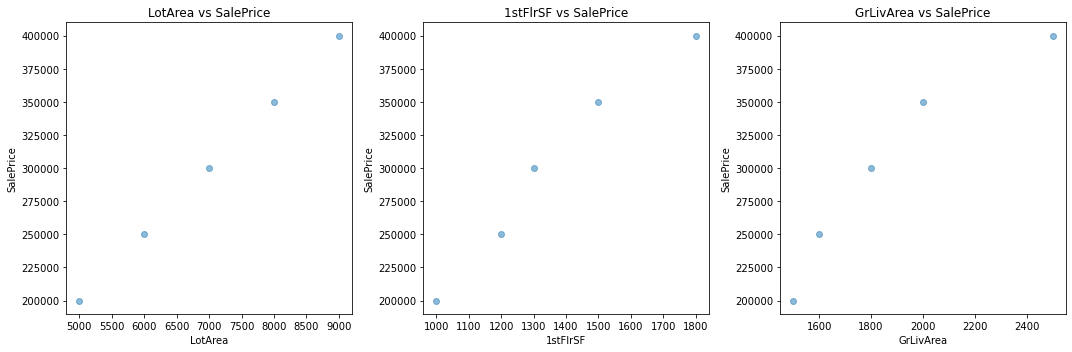

In [19]:
import matplotlib.pyplot as plt

# Create a list of the features
features = ['LotArea', '1stFlrSF', 'GrLivArea']

# Set up the figure and axes
plt.figure(figsize=(15, 5))

# Loop through the features and plot each against SalePrice
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)  # Create subplots (1 row, 3 columns)
    plt.scatter(df[feature], df['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

# Show the plots
plt.tight_layout()
plt.show()


# Your written answer here - do these seem like good candidates for linear regression?
All three features—LotArea, 1stFlrSF, and GrLivArea—seem to have a positive relationship with SalePrice, and their scatter plots appear to show linear trends. Therefore, they are likely good candidates for linear regression, as the relationship appears roughly linear and continuous. However, additional steps like checking for outliers or testing assumptions would be necessary before applying linear regression.

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [25]:
import statsmodels.api as sm

# Define the dependent variable (SalePrice)
y = df['SalePrice']

# Choose a single independent variable (e.g., GrLivArea)
X = df[['GrLivArea']]  # Change 'GrLivArea' to any other feature for experimentation

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Display the results
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sun, 17 Nov 2024   Prob (F-statistic):             0.0104
Time:                        17:30:33   Log-Likelihood:                -56.698
No. Observations:                   5   AIC:                             117.4
Df Residuals:                       3   BIC:                             116.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.924e+04   6.34e+04     -0.934      0.4

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# Your code here - define y and baseline X

In [ ]:
# Your code here - import StatsModels, fit baseline model, display results

In [ ]:
# Your written answer here - interpret model results

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [10]:
import statsmodels.api as sm

# Define target variable (SalePrice) and features (all features in ames_subset)
y = ames_subset['SalePrice']
X = ames_subset.drop('SalePrice', axis=1)

# Add a constant to the features matrix (intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.57e-262
Time:                        19:44:04   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

In [15]:
ames_subset.columns = ames_subset.columns.str.replace('^1stFlrSF', 'FirstFlrSF', regex=True)


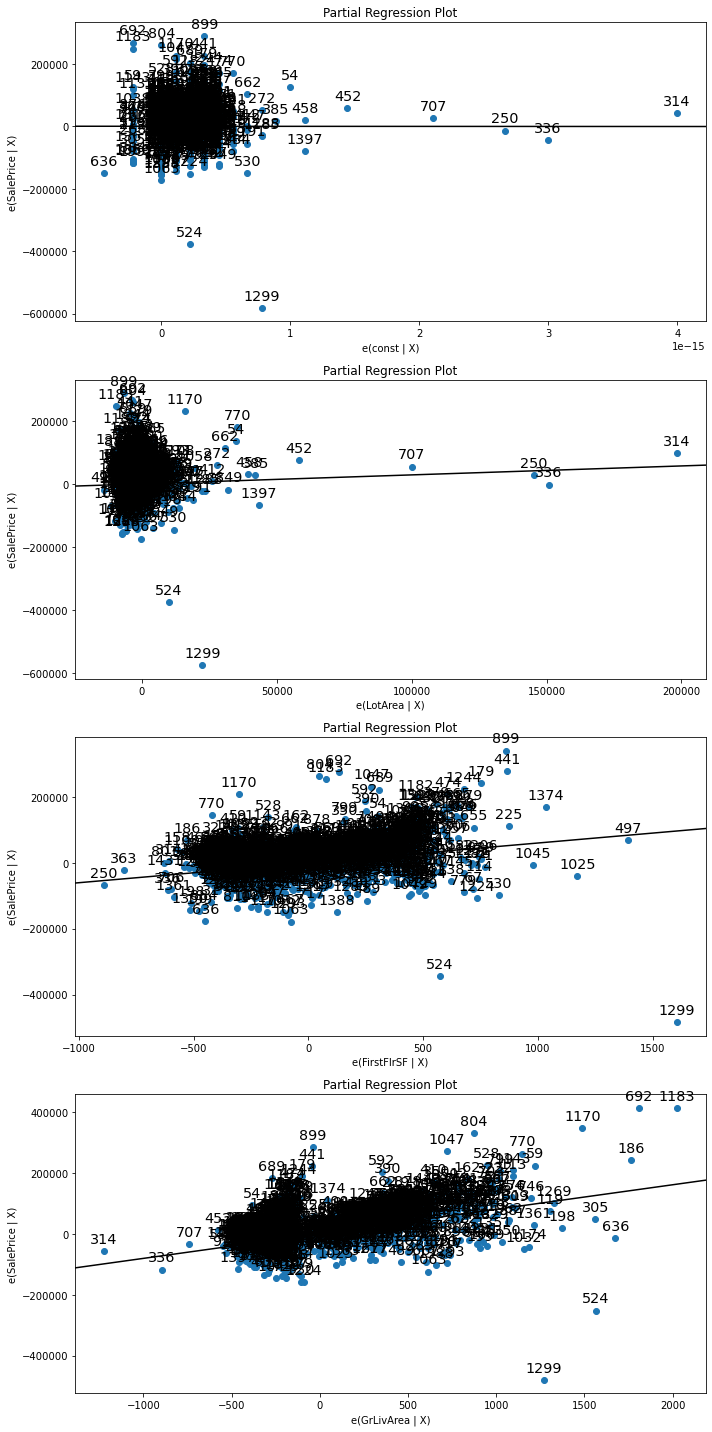

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define target variable (SalePrice) and features (all features in ames_subset)
y = ames_subset['SalePrice']
X = ames_subset.drop('SalePrice', axis=1)

# Add a constant to the features matrix (intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Fix column names if necessary
ames_subset.columns = ames_subset.columns.str.replace('^1stFlrSF', 'FirstFlrSF', regex=True)

import statsmodels.api as sm

# Add a constant column to your DataFrame
ames_subset_with_const = sm.add_constant(ames_subset)

# Now create the partial regression plots
fig, ax = plt.subplots(len(X.columns), 1, figsize=(10, 20))

for i, col in enumerate(X.columns):  # Include the constant term in the iteration
    sm.graphics.plot_partregress('SalePrice', col, [c for c in X.columns if c != col], 
                                 data=ames_subset_with_const, ax=ax[i])

plt.tight_layout()
plt.show()



In [ ]:
# Your code here - create partial regression plots for each predictor

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [26]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define dependent variable (y) and independent variable (X)
y = df['SalePrice']
X = df[['GrLivArea']]  # Use the same independent variable as before

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Display coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficient for GrLivArea:", model.coef_[0])
print("R-squared:", r2)


Intercept: -59235.66878980881
Coefficient for GrLivArea: 191.08280254777065
R-squared: 0.9171974522292994


In [ ]:
# Your code here - compare R-Squared

In [ ]:
# Your code here - compare intercept and coefficients

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.